In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv("data.csv")
names = list(df)

In [3]:
df.iloc[:,20:30]

,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate
0,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09
1,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09
2,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09
3,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09
4,0.319162,0.029690,0.096898,0.168412,0.022096,0.848258,0.689697,0.689697,0.217626,5.510000e+09
...,...,...,...,...,...,...,...,...,...,...
6814,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09
6815,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09
6816,0.324857,0.044255,0.100073,0.173232,0.022068,0.847978,0.689202,0.689202,0.217547,5.990000e+09
6817,0.346573,0.031535,0.111799,0.185584,0.022350,0.854064,0.696113,0.696113,0.218006,7.250000e+09


In [4]:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i], y_list[i], size=16)

In [5]:
num_yes = len(df[df['Bankrupt?'] == 1])
num_no = len(df[df['Bankrupt?'] == 0])

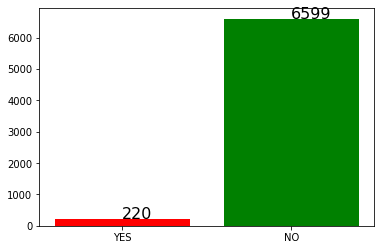

In [6]:
plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
add_value_label(['YES', 'NO'], [num_yes, num_no])

## Normalize data

In [7]:
arr = df.iloc[:,1:].to_numpy()  # bez kolumny "Bankrupt?"

# sklearn.preprocessing.Normalizer działa na wierszach, dlatego transponujemy arr
arr = np.swapaxes(arr, 0, 1)
normalizer = Normalizer().fit(arr)

In [8]:
arr_norm = normalizer.transform(arr)
arr_norm = np.swapaxes(arr_norm, 0, 1)

In [9]:
data_norm = pd.DataFrame(arr_norm, columns=names[1:])
data_norm.insert(0, "Bankrupt?", df.iloc[:,0])

In [10]:
data_norm.iloc[:,:20]
data_norm.iloc[:,20:40]
#data_norm.iloc[:,40:60]
#data_norm.iloc[:,60:80]
#data_norm.iloc[:,80:]
#df.iloc[:,20:40]

,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A)
0,0.011650,4.111470e-12,0.010315,0.008969,0.010515,0.012112,0.012105,0.012104,0.012091,0.009690,3.468459e-14,0.012049,0.011584,8.214412e-13,5.974328e-14,0.012088,1.528786e-12,0.020051,0.010801,0.002063
1,0.011892,4.950762e-12,0.010079,0.010985,0.010504,0.012110,0.012117,0.012117,0.012096,0.011889,4.699612e-14,0.012114,0.011997,2.187711e-12,1.998129e-13,0.012188,8.987843e-13,0.016535,0.011297,0.002077
2,0.011480,1.391738e-12,0.009930,0.009232,0.010827,0.012111,0.012113,0.012113,0.012095,0.014165,4.205139e-14,0.012099,0.011749,4.197292e-12,2.645245e-13,0.012082,1.527474e-12,0.020046,0.010802,0.002094
3,0.012024,3.364252e-12,0.008362,0.009607,0.010488,0.012109,0.012107,0.012107,0.012093,0.009495,4.056638e-14,0.012062,0.012232,1.525112e-12,1.432790e-13,0.012093,6.881502e-13,0.014631,0.011566,0.002073
4,0.011931,6.951607e-12,0.010420,0.010887,0.010511,0.012113,0.012117,0.012117,0.012096,0.010721,4.656200e-14,0.012146,0.012092,2.189980e-12,1.843833e-13,0.012205,3.701995e-13,0.010289,0.012178,0.002178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.011998,4.862230e-12,0.010560,0.011126,0.010644,0.012112,0.012119,0.012118,0.012097,0.013757,4.775319e-14,0.012114,0.012107,3.800187e-12,2.699557e-13,0.012116,4.784338e-13,0.012038,0.011932,0.002115
6815,0.011897,5.396969e-12,0.010604,0.011170,0.010542,0.012113,0.012118,0.012118,0.012097,0.010157,4.725289e-14,0.012124,0.012019,3.367001e-12,3.334638e-13,0.012118,3.323732e-13,0.009588,0.012277,0.002781
6816,0.012143,1.036190e-11,0.010762,0.011199,0.010498,0.012109,0.012108,0.012108,0.012092,0.011655,4.619406e-14,0.012084,0.012083,1.397222e-11,1.736845e-12,0.012101,1.000397e-13,0.003761,0.013099,0.003757
6817,0.012955,7.383648e-12,0.012022,0.011998,0.010632,0.012196,0.012230,0.012230,0.012117,0.014107,5.608087e-14,0.012109,0.012772,4.648177e-12,3.589226e-13,0.012103,2.743554e-13,0.008402,0.012445,0.002270


In [11]:
suspicious_cols = [' Operating Expense Rate',
                   ' Research and development expense rate',
                   ' Interest-bearing debt interest rate',
                   ' Revenue Per Share (Yuan ¥)',
                   ' Net Value Growth Rate',
                   ' Current Ratio',
                   ' Quick Ratio',
                   ' Total debt/Total net worth',
                   ' Accounts Receivable Turnover',
                   ' Average Collection Days',
                   ' Inventory Turnover Rate (times)',
                   ' Fixed Assets Turnover Frequency',
                   ' Revenue per person',
                   ' Allocation rate per person',
                   ' Quick Assets/Current Liability',
                   ' Cash/Current Liability',
                   ' Inventory/Current Liability',
                   ' Long-term Liability to Current Assets',
                   ' Current Asset Turnover Rate',
                   ' Quick Asset Turnover Rate',
                   ' Cash Turnover Rate',
                   ' Fixed Assets to Assets',
                   ' Total assets to GNP price'
                  ]
len(suspicious_cols)

23

In [12]:
df_bool = df[suspicious_cols] > 1
df_bool
df[df_bool.any(axis=1)]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,0,0.477600,0.531127,0.526099,0.595829,0.595858,0.998905,0.797375,0.809294,0.303634,...,0.794028,0.003475,0.623398,0.595827,0.839864,0.281325,0.022309,0.571752,1,0.024803
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


### Clean data by rows

In [13]:
df_bool = df[suspicious_cols] < 1000
# df_bool
df[df_bool.all(axis=1)]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
23,0,0.494857,0.548136,0.540446,0.609507,0.609507,0.999052,0.797413,0.809323,0.303392,...,0.798104,0.018753,0.623486,0.609508,0.840326,0.287134,0.029364,0.568730,1,0.018005
84,0,0.474675,0.534780,0.527812,0.605291,0.605291,0.998968,0.797391,0.809317,0.303530,...,0.798238,0.000717,0.624029,0.605289,0.840168,0.276091,0.026827,0.565324,1,0.078900
137,0,0.508556,0.563727,0.564859,0.603533,0.603533,0.999005,0.797482,0.809401,0.303609,...,0.811876,0.007121,0.624679,0.603529,0.841481,0.281101,0.026865,0.565488,1,0.025310
569,0,0.388047,0.461459,0.458108,0.596290,0.596290,0.998682,0.795878,0.808276,0.301484,...,0.748854,0.000454,0.624642,0.596288,0.837758,0.275052,0.026791,0.565156,1,0.271140
629,0,0.561010,0.609137,0.615504,0.615410,0.615410,0.999171,0.797572,0.809469,0.303420,...,0.826813,0.000373,0.623344,0.615405,0.844143,0.287221,0.026996,0.565977,1,0.017952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,0,0.624482,0.685292,0.668826,0.629946,0.629946,0.999293,0.797830,0.809675,0.303617,...,0.878025,0.000958,0.624011,0.629945,0.844724,0.276291,0.026791,0.565158,1,0.070373
6763,0,0.518452,0.580299,0.568874,0.614004,0.614004,0.999107,0.797507,0.809414,0.303442,...,0.824987,0.000457,0.624147,0.614002,0.841683,0.276219,0.026791,0.565158,1,0.073188
6789,0,0.284941,0.314599,0.306119,0.605226,0.605010,0.998741,0.796512,0.808441,0.302468,...,0.665514,0.000298,0.624243,0.605227,0.830563,0.278538,0.026774,0.565077,1,0.035334
6801,0,0.543948,0.606738,0.590021,0.620346,0.620346,0.999176,0.797681,0.809546,0.303600,...,0.836314,0.001398,0.624129,0.620343,0.842457,0.276694,0.026793,0.565166,1,0.058338


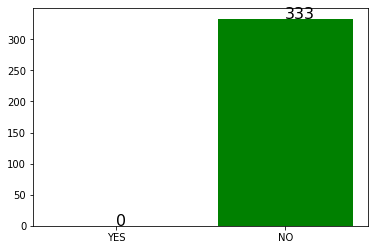

In [14]:
df_clean = df[df_bool.all(axis=1)]
num_yes = len(df_clean[df_clean['Bankrupt?'] == 1])
num_no = len(df_clean[df_clean['Bankrupt?'] == 0])

plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
add_value_label(['YES', 'NO'], [num_yes, num_no])

### Clean data by columns

In [15]:
names_subset = set(names).difference(set(suspicious_cols))
df[names_subset]
df_bool = df[list(names_subset)] < 1000000
# # df_bool
df_bool[df_bool.all(axis=1)]

# len(df[' Total Asset Growth Rate'][df[' Total Asset Growth Rate'] > 100000])

,Net Value Per Share (B),Total income/Total expense,Net Income to Stockholder's Equity,Current Liability to Current Assets,Net Income to Total Assets,Total Asset Return Growth Rate Ratio,Total Asset Growth Rate,ROA(A) before interest and % after tax,Interest Expense Ratio,ROA(B) before interest and depreciation after tax,...,Long-term fund suitability ratio (A),Equity to Liability,Debt ratio %,Working capitcal Turnover Rate,Tax rate (A),No-credit Interval,Retained Earnings to Total Assets,Net worth/Assets,Equity to Long-term Liability,Current Liability to Equity
158,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
217,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
228,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
275,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6776,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6781,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6795,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [16]:
names_subset.remove(' Total Asset Growth Rate')
names_subset.remove(' Net Income Flag')  # all companies have value=1
df_bool = df[list(names_subset)] < 1000
df_clean = df[list(names_subset)][df_bool.all(axis=1)]
df_clean

,Net Value Per Share (B),Total income/Total expense,Net Income to Stockholder's Equity,Current Liability to Current Assets,Net Income to Total Assets,Total Asset Return Growth Rate Ratio,ROA(A) before interest and % after tax,Interest Expense Ratio,ROA(B) before interest and depreciation after tax,Total Asset Turnover,...,Long-term fund suitability ratio (A),Equity to Liability,Debt ratio %,Working capitcal Turnover Rate,Tax rate (A),No-credit Interval,Retained Earnings to Total Assets,Net worth/Assets,Equity to Long-term Liability,Current Liability to Equity
0,0.147950,0.002022,0.827890,0.118250,0.716845,0.263100,0.424389,0.629951,0.405750,0.086957,...,0.005024,0.016469,0.207576,0.593831,0.000000,0.622879,0.903225,0.792424,0.126549,0.339077
1,0.182251,0.002226,0.839969,0.047775,0.795297,0.264516,0.538214,0.635172,0.516730,0.064468,...,0.005059,0.020794,0.171176,0.593916,0.000000,0.623652,0.931065,0.828824,0.120916,0.329740
2,0.177911,0.002060,0.836774,0.025346,0.774670,0.264184,0.499019,0.629631,0.472295,0.014993,...,0.005100,0.016474,0.207516,0.594502,0.000000,0.623841,0.909903,0.792484,0.117922,0.334777
3,0.154187,0.001831,0.834697,0.067250,0.739555,0.263371,0.451265,0.630228,0.457733,0.089955,...,0.005047,0.023982,0.151465,0.593889,0.000000,0.622929,0.906902,0.848535,0.120760,0.331509
4,0.167502,0.002224,0.839973,0.047725,0.795016,0.265218,0.538432,0.636055,0.522298,0.175412,...,0.005303,0.035490,0.106509,0.593915,0.000000,0.623521,0.913850,0.893491,0.110933,0.330726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.175045,0.002266,0.840359,0.027951,0.799927,0.264517,0.539468,0.631415,0.543230,0.103448,...,0.005150,0.029890,0.124618,0.593985,0.113372,0.623620,0.925611,0.875382,0.112622,0.330914
6815,0.181324,0.002288,0.840306,0.031470,0.799748,0.264730,0.538269,0.631489,0.524172,0.103448,...,0.006772,0.038284,0.099253,0.593954,0.371596,0.623931,0.932629,0.900747,0.112329,0.329753
6816,0.269521,0.002239,0.840138,0.007542,0.797778,0.263858,0.533744,0.630612,0.520638,0.106447,...,0.009149,0.097649,0.038939,0.594025,0.490839,0.624156,0.932000,0.961061,0.110933,0.326921
6817,0.213392,0.002395,0.841084,0.022916,0.811808,0.264409,0.559911,0.630731,0.554045,0.109445,...,0.005529,0.044009,0.086979,0.593997,0.181294,0.623957,0.939613,0.913021,0.110957,0.329294


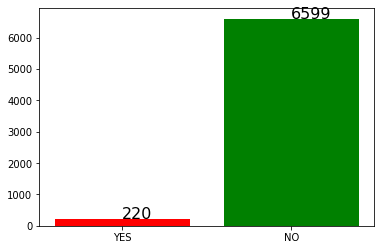

In [17]:
num_yes = len(df_clean[df_clean['Bankrupt?'] == 1])
num_no = len(df_clean[df_clean['Bankrupt?'] == 0])

plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
add_value_label(['YES', 'NO'], [num_yes, num_no])

# Clustering algorithms

In [18]:
attr = names_subset
attr.remove('Bankrupt?')
cl = ['Bankrupt?']

In [19]:
X = df_clean[attr]
Y = df_clean[cl].to_numpy()

In [20]:
Y = Y.reshape(len(Y))

## k-means

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [ ]:
def calculate_stats(labels_pred, labels_true):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
    print('Rand Score: %0.3f' % metrics.rand_score(labels_true, labels_pred))
    print('Adjusted Rand Score: %0.3f' % metrics.adjusted_rand_score(labels_true, labels_pred))
    print('\nPair Confusion Matrix: \n\n', metrics.pair_confusion_matrix(labels_true, labels_pred))

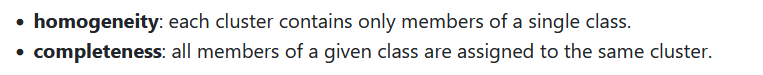

In [ ]:
def train_k_means(X, Y):
    k_means = KMeans(init="k-means++", n_clusters=2, n_init=5)
    k_means.fit(X)
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
    print(np.unique(k_means_labels, return_counts=True), end="\n\n")
    calculate_stats(k_means_labels, Y)

In [ ]:
train_k_means(X, Y)

In [ ]:
expected = np.array([1,1,0,0])
predicted = np.array([1,1,0,0])
metrics.confusion_matrix(expected, predicted)

In [ ]:
# sklearn gmm

## Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def train_hierarchical(X, Y):
    agglom = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(X)
    print(np.unique(agglom.labels_, return_counts=True), end="\n\n")
    calculate_stats(agglom.labels_, Y)      

In [ ]:
train_hierarchical(X, Y)

In [ ]:
from sklearn.neighbors import kneighbors_graph

In [ ]:
def train_hierarchical2(X, Y):
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    agglom2 = AgglomerativeClustering(n_clusters=2, connectivity=connectivity, linkage="ward").fit(X)
    print(np.unique(agglom2.labels_, return_counts=True), end="\n")
    calculate_stats(agglom2.labels_, Y)

In [ ]:
train_hierarchical2(X, Y)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
def train_dbscan(X, Y):
    db = DBSCAN(eps=0.35, min_samples=50).fit(X)
    print(np.unique(db.labels_, return_counts=True), end="\n\n")
    calculate_stats(db.labels_, Y)

In [ ]:
train_dbscan(X, Y)

## OPTICS

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
def train_optics(X, Y):
    clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
    clust.fit(X)
    print(np.unique(clust.labels_, return_counts=True), end="\n\n")
    calculate_stats(clust.labels_, Y)

In [ ]:
#train_optics(X, Y)

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def plot_pca2(pca2_):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC1', fontsize = 15)
    ax.set_ylabel('PC2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    bankrupt_idx = pca2_['y'] == 1
    non_bankrupt_idx = pca2_['y'] == 0

    ax.scatter(pca2_.loc[bankrupt_idx, 'pc1'], pca2_.loc[bankrupt_idx, 'pc2'], c = 'r', s = 15, marker='s')
    ax.scatter(pca2_.loc[non_bankrupt_idx, 'pc1'], pca2_.loc[non_bankrupt_idx, 'pc2'], c = 'b', s = 5)

    ax.legend(['Bankrupt', 'Non-bankrupt'])
    ax.grid()
    
def plot_pca3(pca3_):
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('PC1', fontsize = 15)
    ax.set_ylabel('PC2', fontsize = 15)
    ax.set_zlabel('PC3', fontsize = 15)
    ax.set_title('3 component PCA', fontsize = 20)

    bankrupt_idx = pca3_['y'] == 1
    non_bankrupt_idx = pca3_['y'] == 0

    ax.scatter(pca3_.loc[bankrupt_idx, 'pc1'], pca3_.loc[bankrupt_idx, 'pc2'], pca3_.loc[bankrupt_idx, 'pc3'], c='r', s=15, marker='s')
    ax.scatter(pca3_.loc[non_bankrupt_idx, 'pc1'], pca3_.loc[non_bankrupt_idx, 'pc2'], pca3_.loc[non_bankrupt_idx, 'pc3'], c='b', s=5)

    ax.legend(['Bankrupt', 'Non-bankrupt'])
    ax.grid()

### PCA 2 components

In [ ]:
def pca2(X, Y):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    pca2 = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    pca2_ = pd.concat([pca2, pd.DataFrame(Y, columns = ['y'])], axis = 1)
    plot_pca2(pca2_)
pca2(X, Y)

### PCA 3 components

In [ ]:
def pca3(X, Y):
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(X)
    pca3 = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])
    pca3_ = pd.concat([pca3, pd.DataFrame(Y, columns = ['y'])], axis = 1)
    plot_pca3(pca3_)
pca3(X, Y)

## Undersampling 

In [ ]:
data = df_clean[df_clean['Bankrupt?'] == 1]
data = pd.concat([data, df_clean[df_clean['Bankrupt?'] == 0].sample(n=220)])

num_yes = len(data[data['Bankrupt?'] == 1])
num_no = len(data[data['Bankrupt?'] == 0])

plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
add_value_label(['YES', 'NO'], [num_yes, num_no])

In [ ]:
pca2(data[attr], data[cl].to_numpy())

In [ ]:
pca3(data[attr], data[cl].to_numpy())

## k-means

In [ ]:
train_k_means(data[attr], data[cl].to_numpy().reshape(len(data)))

## Hierarchical

In [ ]:
train_hierarchical(data[attr], data[cl].to_numpy().reshape(len(data)))

In [ ]:
train_hierarchical2(data[attr], data[cl].to_numpy().reshape(len(data)))

## DBSCAN

In [ ]:
train_dbscan(data[attr], data[cl].to_numpy().reshape(len(data)))

## Neural Network

In [21]:
import tensorflow as tf
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras import regularizers
%load_ext tensorboard

In [22]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [102]:
# logdir = os.path.join("logs", 'standard')

def nn(X, y, val_ratio=0.3, name='default', lr=0.0001, decay=0.00001):
    global results
    
    # split data
    while True:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = val_ratio) 
        if all(np.unique(y_test, return_counts=True)[1] > 50):
            break
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr, decay=decay)
    
    # model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(70,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(64, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(128, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(128, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(256, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(256, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(512, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Dense(512, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
#     model.add(tf.keras.layers.Dense(128, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.3))
    
#     model.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.3))
    
#     model.add(tf.keras.layers.Dense(128, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
    
#     model.add(tf.keras.layers.Dense(64, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # model.summary()
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy', 'AUC', precision_m, recall_m, f1_m])
    
    # tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    cl_weights = {1: 3,
                 0: 1} # Bankrupt ratio (1) = 0.04, Non-bankrupt ratio (0) = 0.96. So we set 24x for loss function for class 1

    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        batch_size=32,
                        epochs=60,
                        # callbacks=[tensorboard_callback]
                        class_weight=cl_weights
                     )
    
    y_pred = model.predict(X_test)
    # print(np.round(y_pred))
    matrix = confusion_matrix(y_test, np.round(y_pred))
    print("\nConfusion matrix: \n", matrix)
    
    f1 = f1_score(y_test, np.round(y_pred), zero_division=1)
    # results[len(results.items())] = ['Neural_Network' + name, f1, len(y)]
    print("\nF1 Score:", f1)
    return model, history

In [36]:
# Y = pd.DataFrame(Y, columns=['Y'])

In [42]:
# nn(df_clean[attr], df_clean[cl], lr=0.001)
model_nn, history = nn(X, Y, lr=0.001)

Epoch 1/50
150/150 [==============================] - 2s 7ms/step - loss: 0.1765 - binary_accuracy: 0.9644 - auc: 0.4738 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.1276 - val_binary_accuracy: 0.9697 - val_auc: 0.8242 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 1s 5ms/step - loss: 0.1435 - binary_accuracy: 0.9669 - auc: 0.6640 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.1421 - val_binary_accuracy: 0.9697 - val_auc: 0.8728 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/50
150/150 [==============================] - 1s 5ms/step - loss: 0.1335 - binary_accuracy: 0.9669 - auc: 0.7484 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.0976 - val_binary_accuracy: 0.9697 - val_auc: 0.8975 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0

Epoch 26/50
150/150 [==============================] - 1s 5ms/step - loss: 0.1061 - binary_accuracy: 0.9669 - auc: 0.8875 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.0864 - val_binary_accuracy: 0.9717 - val_auc: 0.9197 - val_precision_m: 0.0625 - val_recall_m: 0.0404 - val_f1_m: 0.0453
Epoch 27/50
150/150 [==============================] - 1s 5ms/step - loss: 0.1018 - binary_accuracy: 0.9661 - auc: 0.8940 - precision_m: 0.0067 - recall_m: 0.0067 - f1_m: 0.0067 - val_loss: 0.0885 - val_binary_accuracy: 0.9717 - val_auc: 0.9168 - val_precision_m: 0.0625 - val_recall_m: 0.0404 - val_f1_m: 0.0453
Epoch 28/50
150/150 [==============================] - 1s 5ms/step - loss: 0.1037 - binary_accuracy: 0.9663 - auc: 0.8971 - precision_m: 0.0067 - recall_m: 0.0033 - f1_m: 0.0044 - val_loss: 0.0939 - val_binary_accuracy: 0.9697 - val_auc: 0.9227 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 29/50
150/150 [================

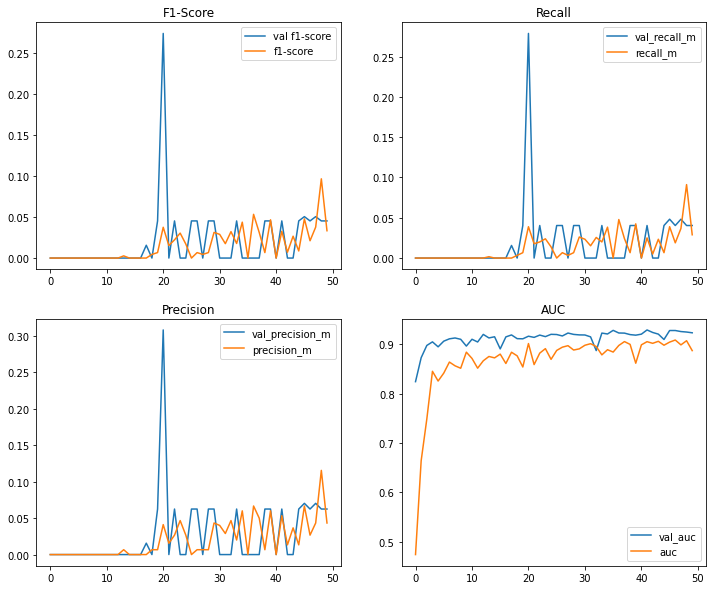

In [62]:
fix, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].plot(history.history['val_f1_m'])
ax[0, 0].plot(history.history['f1_m'])
ax[0, 0].legend(['val f1-score', 'f1-score'])
ax[0, 0].set_title("F1-Score")

ax[0, 1].plot(history.history['val_recall_m'])
ax[0, 1].plot(history.history['recall_m'])
ax[0, 1].legend(['val_recall_m', 'recall_m'])
ax[0, 1].set_title("Recall")

ax[1, 0].plot(history.history['val_precision_m'])
ax[1, 0].plot(history.history['precision_m'])
ax[1, 0].legend(['val_precision_m', 'precision_m'])
ax[1, 0].set_title("Precision")

ax[1, 1].plot(history.history['val_auc'])
ax[1, 1].plot(history.history['auc'])
ax[1, 1].legend(['val_auc', 'auc'])
ax[1, 1].set_title("AUC")

plt.show()

In [47]:
model_nn_wgh, history_wgh = nn(X, Y, lr=0.001)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
150/150 [==============================] - 2s 7ms/step - loss: 0.8672 - binary_accuracy: 0.9631 - auc: 0.5290 - precision_m: 4.7619e-04 - recall_m: 0.0067 - f1_m: 8.8889e-04 - val_loss: 0.4725 - val_binary_accuracy: 0.9726 - val_auc: 0.8452 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 1s 5ms/step - loss: 0.8600 - binary_accuracy: 0.9656 - auc: 0.5581 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.4656 - val_binary_accuracy: 0.9726 - val_auc: 0.8553 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/50
150/150 [==============================] - 1s 5ms/step - loss: 0.7243 - binary_accuracy: 0.9656 - auc: 0.7458 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val

150/150 [==============================] - 1s 5ms/step - loss: 0.4816 - binary_accuracy: 0.8825 - auc: 0.9082 - precision_m: 0.2122 - recall_m: 0.4917 - f1_m: 0.2632 - val_loss: 0.2664 - val_binary_accuracy: 0.8807 - val_auc: 0.9125 - val_precision_m: 0.1360 - val_recall_m: 0.4206 - val_f1_m: 0.1992 
Epoch 26/50
150/150 [==============================] - 1s 5ms/step - loss: 0.4924 - binary_accuracy: 0.8944 - auc: 0.9026 - precision_m: 0.2296 - recall_m: 0.4889 - f1_m: 0.2835 - val_loss: 0.1637 - val_binary_accuracy: 0.9101 - val_auc: 0.9129 - val_precision_m: 0.1506 - val_recall_m: 0.3841 - val_f1_m: 0.2100
Epoch 27/50
150/150 [==============================] - 1s 5ms/step - loss: 0.5089 - binary_accuracy: 0.8728 - auc: 0.8940 - precision_m: 0.1958 - recall_m: 0.4621 - f1_m: 0.2471 - val_loss: 0.2351 - val_binary_accuracy: 0.8783 - val_auc: 0.9136 - val_precision_m: 0.1359 - val_recall_m: 0.4362 - val_f1_m: 0.2000
Epoch 28/50
150/150 [==============================] - 1s 5ms/step - los

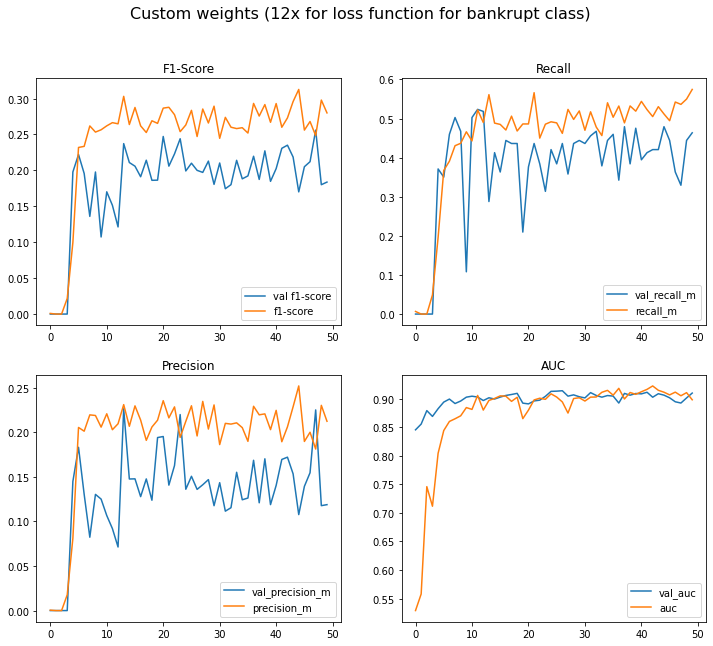

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].plot(history_wgh.history['val_f1_m'])
ax[0, 0].plot(history_wgh.history['f1_m'])
ax[0, 0].legend(['val f1-score', 'f1-score'])
ax[0, 0].set_title("F1-Score")

ax[0, 1].plot(history_wgh.history['val_recall_m'])
ax[0, 1].plot(history_wgh.history['recall_m'])
ax[0, 1].legend(['val_recall_m', 'recall_m'])
ax[0, 1].set_title("Recall")

ax[1, 0].plot(history_wgh.history['val_precision_m'])
ax[1, 0].plot(history_wgh.history['precision_m'])
ax[1, 0].legend(['val_precision_m', 'precision_m'])
ax[1, 0].set_title("Precision")

ax[1, 1].plot(history_wgh.history['val_auc'])
ax[1, 1].plot(history_wgh.history['auc'])
ax[1, 1].legend(['val_auc', 'auc'])
ax[1, 1].set_title("AUC")

fig.suptitle("Custom weights (12x for loss function for bankrupt class)", fontsize=16)
plt.show()

In [73]:
model_nn_wgh, history_wgh_24 = nn(X, Y, lr=0.001)

Epoch 1/50
150/150 [==============================] - 4s 16ms/step - loss: 1.2340 - binary_accuracy: 0.9392 - auc: 0.5265 - precision_m: 0.0232 - recall_m: 0.0417 - f1_m: 0.0243 - val_loss: 0.6566 - val_binary_accuracy: 0.9692 - val_auc: 0.7637 - val_precision_m: 0.0781 - val_recall_m: 0.0599 - val_f1_m: 0.0651
Epoch 2/50
150/150 [==============================] - 1s 10ms/step - loss: 1.2212 - binary_accuracy: 0.6432 - auc: 0.5211 - precision_m: 0.0275 - recall_m: 0.1944 - f1_m: 0.0375 - val_loss: 0.6455 - val_binary_accuracy: 0.9697 - val_auc: 0.5254 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/50
150/150 [==============================] - 1s 9ms/step - loss: 1.2098 - binary_accuracy: 0.7490 - auc: 0.5752 - precision_m: 0.0338 - recall_m: 0.1878 - f1_m: 0.0455 - val_loss: 0.3638 - val_binary_accuracy: 0.9692 - val_auc: 0.8250 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/50
150/150 [==================

150/150 [==============================] - 1s 9ms/step - loss: 0.8490 - binary_accuracy: 0.7886 - auc: 0.8515 - precision_m: 0.1461 - recall_m: 0.4961 - f1_m: 0.2056 - val_loss: 0.5744 - val_binary_accuracy: 0.7263 - val_auc: 0.8604 - val_precision_m: 0.0883 - val_recall_m: 0.5443 - val_f1_m: 0.1484
Epoch 28/50
150/150 [==============================] - 1s 8ms/step - loss: 0.7273 - binary_accuracy: 0.8634 - auc: 0.8841 - precision_m: 0.2046 - recall_m: 0.5422 - f1_m: 0.2688 - val_loss: 0.3750 - val_binary_accuracy: 0.8377 - val_auc: 0.8667 - val_precision_m: 0.1325 - val_recall_m: 0.5052 - val_f1_m: 0.2007
Epoch 29/50
150/150 [==============================] - 1s 8ms/step - loss: 0.7160 - binary_accuracy: 0.8521 - auc: 0.8842 - precision_m: 0.1697 - recall_m: 0.5267 - f1_m: 0.2390 - val_loss: 0.4168 - val_binary_accuracy: 0.8275 - val_auc: 0.8502 - val_precision_m: 0.1285 - val_recall_m: 0.5208 - val_f1_m: 0.1983
Epoch 30/50
150/150 [==============================] - 1s 7ms/step - loss

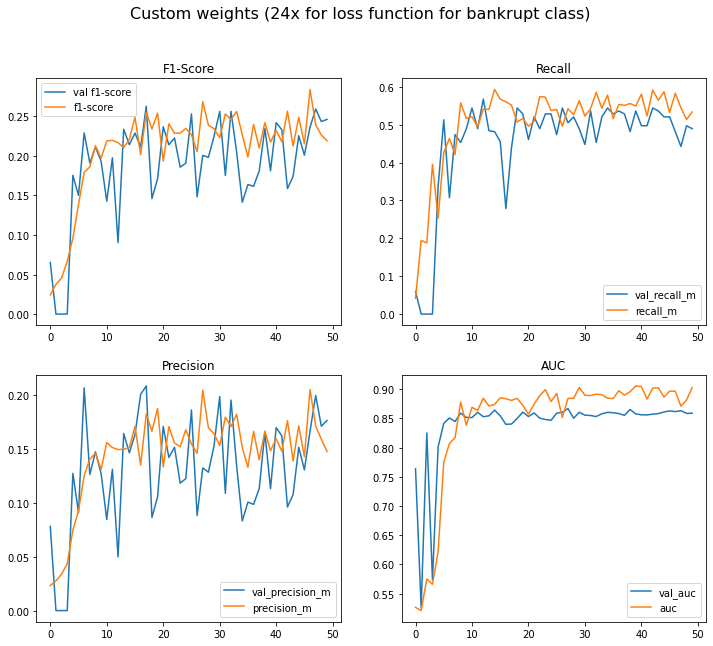

In [80]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].plot(history_wgh_24.history['val_f1_m'])
ax[0, 0].plot(history_wgh_24.history['f1_m'])
ax[0, 0].legend(['val f1-score', 'f1-score'])
ax[0, 0].set_title("F1-Score")

ax[0, 1].plot(history_wgh_24.history['val_recall_m'])
ax[0, 1].plot(history_wgh_24.history['recall_m'])
ax[0, 1].legend(['val_recall_m', 'recall_m'])
ax[0, 1].set_title("Recall")

ax[1, 0].plot(history_wgh_24.history['val_precision_m'])
ax[1, 0].plot(history_wgh_24.history['precision_m'])
ax[1, 0].legend(['val_precision_m', 'precision_m'])
ax[1, 0].set_title("Precision")

ax[1, 1].plot(history_wgh_24.history['val_auc'])
ax[1, 1].plot(history_wgh_24.history['auc'])
ax[1, 1].legend(['val_auc', 'auc'])
ax[1, 1].set_title("AUC")

fig.suptitle("Custom weights (24x for loss function for bankrupt class)", fontsize=16)
plt.show()

In [77]:
model_nn_wgh, history_wgh_50 = nn(X, Y, lr=0.001)

Epoch 1/50
150/150 [==============================] - 4s 14ms/step - loss: 1.7733 - binary_accuracy: 0.2925 - auc: 0.5341 - precision_m: 0.0294 - recall_m: 0.4967 - f1_m: 0.0544 - val_loss: 0.7315 - val_binary_accuracy: 0.1427 - val_auc: 0.8169 - val_precision_m: 0.0342 - val_recall_m: 0.6687 - val_f1_m: 0.0643
Epoch 2/50
150/150 [==============================] - 1s 10ms/step - loss: 1.6242 - binary_accuracy: 0.3798 - auc: 0.6589 - precision_m: 0.0537 - recall_m: 0.5828 - f1_m: 0.0929 - val_loss: 0.7050 - val_binary_accuracy: 0.5352 - val_auc: 0.8362 - val_precision_m: 0.0584 - val_recall_m: 0.5932 - val_f1_m: 0.1042
Epoch 3/50
150/150 [==============================] - 1s 10ms/step - loss: 1.4951 - binary_accuracy: 0.4161 - auc: 0.7406 - precision_m: 0.0527 - recall_m: 0.5628 - f1_m: 0.0904 - val_loss: 0.9233 - val_binary_accuracy: 0.3148 - val_auc: 0.8302 - val_precision_m: 0.0405 - val_recall_m: 0.6141 - val_f1_m: 0.0749
Epoch 4/50
150/150 [==============================] - 1s 7ms/

150/150 [==============================] - 1s 10ms/step - loss: 1.0230 - binary_accuracy: 0.7821 - auc: 0.8914 - precision_m: 0.1309 - recall_m: 0.5756 - f1_m: 0.2045 - val_loss: 0.4496 - val_binary_accuracy: 0.7141 - val_auc: 0.8787 - val_precision_m: 0.1010 - val_recall_m: 0.5932 - val_f1_m: 0.1634
Epoch 28/50
150/150 [==============================] - 1s 7ms/step - loss: 1.0537 - binary_accuracy: 0.7213 - auc: 0.8971 - precision_m: 0.1040 - recall_m: 0.6178 - f1_m: 0.1721 - val_loss: 0.4359 - val_binary_accuracy: 0.8021 - val_auc: 0.8748 - val_precision_m: 0.1309 - val_recall_m: 0.5724 - val_f1_m: 0.2023
Epoch 29/50
150/150 [==============================] - 1s 9ms/step - loss: 1.0508 - binary_accuracy: 0.7220 - auc: 0.8926 - precision_m: 0.1090 - recall_m: 0.6089 - f1_m: 0.1769 - val_loss: 0.4371 - val_binary_accuracy: 0.7908 - val_auc: 0.8755 - val_precision_m: 0.1275 - val_recall_m: 0.5724 - val_f1_m: 0.1981
Epoch 30/50
150/150 [==============================] - 1s 10ms/step - lo

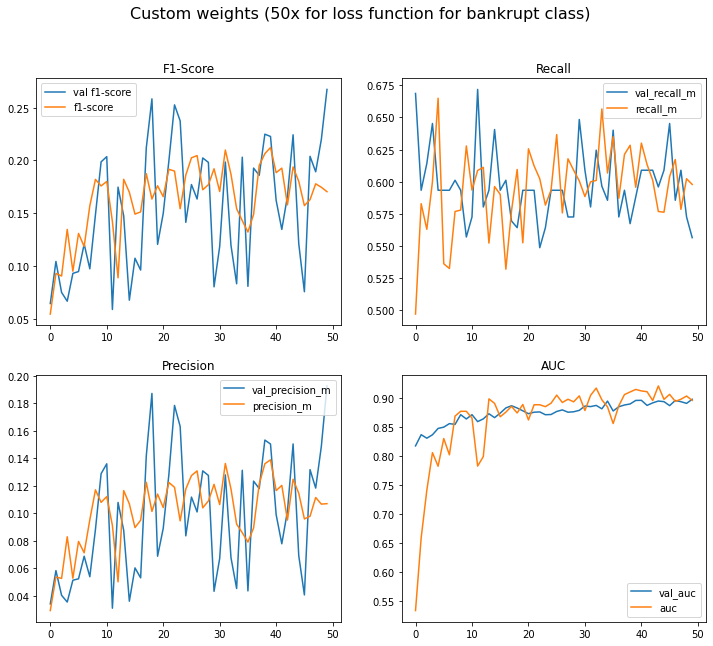

In [78]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].plot(history_wgh_50.history['val_f1_m'])
ax[0, 0].plot(history_wgh_50.history['f1_m'])
ax[0, 0].legend(['val f1-score', 'f1-score'])
ax[0, 0].set_title("F1-Score")

ax[0, 1].plot(history_wgh_50.history['val_recall_m'])
ax[0, 1].plot(history_wgh_50.history['recall_m'])
ax[0, 1].legend(['val_recall_m', 'recall_m'])
ax[0, 1].set_title("Recall")

ax[1, 0].plot(history_wgh_50.history['val_precision_m'])
ax[1, 0].plot(history_wgh_50.history['precision_m'])
ax[1, 0].legend(['val_precision_m', 'precision_m'])
ax[1, 0].set_title("Precision")

ax[1, 1].plot(history_wgh_50.history['val_auc'])
ax[1, 1].plot(history_wgh_50.history['auc'])
ax[1, 1].legend(['val_auc', 'auc'])
ax[1, 1].set_title("AUC")

fig.suptitle("Custom weights (50x for loss function for bankrupt class)", fontsize=16)
plt.show()

In [103]:
model_nn_wgh, history_wgh_5 = nn(X, Y, lr=0.0001, decay=0.00001)

Epoch 1/60
150/150 [==============================] - 3s 10ms/step - loss: 0.3513 - binary_accuracy: 0.9684 - auc: 0.5197 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.2498 - val_binary_accuracy: 0.9594 - val_auc: 0.8418 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/60
150/150 [==============================] - 1s 8ms/step - loss: 0.3060 - binary_accuracy: 0.9713 - auc: 0.5559 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.3110 - val_binary_accuracy: 0.9594 - val_auc: 0.8668 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/60
150/150 [==============================] - 1s 8ms/step - loss: 0.3016 - binary_accuracy: 0.9713 - auc: 0.5636 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.2876 - val_binary_accuracy: 0.9594 - val_auc: 0.8856 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.

150/150 [==============================] - 1s 8ms/step - loss: 0.2173 - binary_accuracy: 0.9713 - auc: 0.8671 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.1641 - val_binary_accuracy: 0.9594 - val_auc: 0.9173 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 26/60
150/150 [==============================] - 1s 8ms/step - loss: 0.2162 - binary_accuracy: 0.9713 - auc: 0.8674 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.1660 - val_binary_accuracy: 0.9594 - val_auc: 0.9157 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 27/60
150/150 [==============================] - 1s 8ms/step - loss: 0.2123 - binary_accuracy: 0.9711 - auc: 0.8804 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.1204 - val_binary_accuracy: 0.9594 - val_auc: 0.9169 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
E

Epoch 51/60
150/150 [==============================] - 1s 8ms/step - loss: 0.1910 - binary_accuracy: 0.9635 - auc: 0.9046 - precision_m: 0.2213 - recall_m: 0.2422 - f1_m: 0.2153 - val_loss: 0.1519 - val_binary_accuracy: 0.9487 - val_auc: 0.9275 - val_precision_m: 0.3214 - val_recall_m: 0.4029 - val_f1_m: 0.3342
Epoch 52/60
150/150 [==============================] - 1s 8ms/step - loss: 0.1950 - binary_accuracy: 0.9650 - auc: 0.8984 - precision_m: 0.2133 - recall_m: 0.2221 - f1_m: 0.2038 - val_loss: 0.1464 - val_binary_accuracy: 0.9541 - val_auc: 0.9232 - val_precision_m: 0.2750 - val_recall_m: 0.2812 - val_f1_m: 0.2628
Epoch 53/60
150/150 [==============================] - 1s 8ms/step - loss: 0.1943 - binary_accuracy: 0.9617 - auc: 0.8977 - precision_m: 0.2246 - recall_m: 0.2017 - f1_m: 0.1946 - val_loss: 0.1440 - val_binary_accuracy: 0.9501 - val_auc: 0.9253 - val_precision_m: 0.3010 - val_recall_m: 0.3021 - val_f1_m: 0.2796
Epoch 54/60
150/150 [==============================] - 1s 8ms

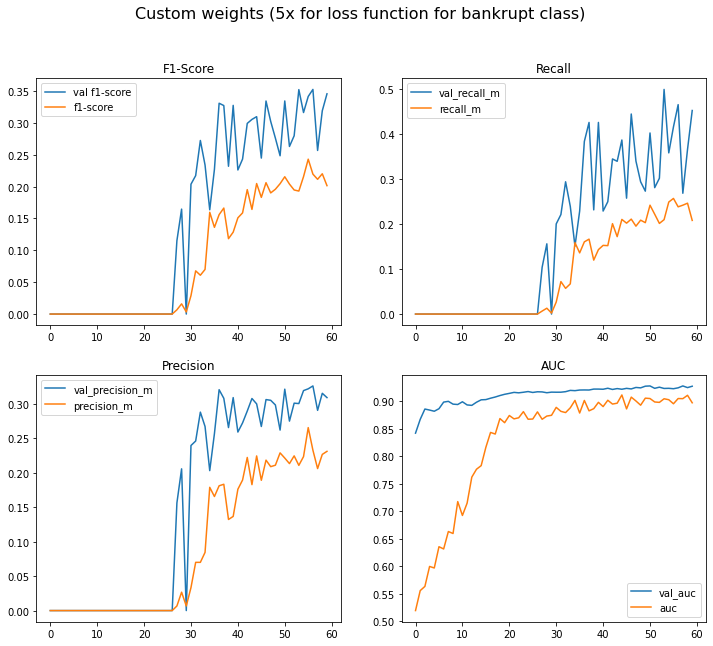

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].plot(history_wgh_5.history['val_f1_m'])
ax[0, 0].plot(history_wgh_5.history['f1_m'])
ax[0, 0].legend(['val f1-score', 'f1-score'])
ax[0, 0].set_title("F1-Score")

ax[0, 1].plot(history_wgh_5.history['val_recall_m'])
ax[0, 1].plot(history_wgh_5.history['recall_m'])
ax[0, 1].legend(['val_recall_m', 'recall_m'])
ax[0, 1].set_title("Recall")

ax[1, 0].plot(history_wgh_5.history['val_precision_m'])
ax[1, 0].plot(history_wgh_5.history['precision_m'])
ax[1, 0].legend(['val_precision_m', 'precision_m'])
ax[1, 0].set_title("Precision")

ax[1, 1].plot(history_wgh_5.history['val_auc'])
ax[1, 1].plot(history_wgh_5.history['auc'])
ax[1, 1].legend(['val_auc', 'auc'])
ax[1, 1].set_title("AUC")

fig.suptitle("Custom weights (5x for loss function for bankrupt class)", fontsize=16)
plt.show()

In [ ]:
y_pred = model_nn.predict(df_clean[attr])

In [ ]:
(np.round(y_pred) == df_clean[cl]).value_counts()

In [ ]:
metrics.confusion_matrix(np.round(y_pred), df_clean[cl])

In [ ]:
metrics.f1_score(np.round(y_pred), df_clean[cl])

# What's next?

    * DBSCAN ?
    
    26.05
    * Feature Selection !!!
    * Train NN on the whole bankrupt observations (and with custom cl_weights of course)
    * Boosting techniques (boost only for bankrupt observations)
    * Walidacja krzyżowa
    * SVM

In [ ]:
220 / 6599

In [ ]:
(6599 - 220) / 6599